<a href="https://colab.research.google.com/github/cjakuc/DS-Unit2_Build-Week/blob/master/Data%20Cleaning%20and%20Modeling/LS_DS_231_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 2, Sprint 3, Module 1*

---


# Define ML problems

You will use your portfolio project dataset for all assignments this sprint.

## Assignment

Complete these tasks for your project, and document your decisions.

- [x] Choose your target. Which column in your tabular dataset will you predict?
- [x] Is your problem regression or classification?
- [x] How is your target distributed?
    - Classification: How many classes? Are the classes imbalanced?
    - Regression: Is the target right-skewed? If so, you may want to log transform the target.
- [X] Choose your evaluation metric(s).
    - Classification: Is your majority class frequency >= 50% and < 70% ? If so, you can just use accuracy if you want. Outside that range, accuracy could be misleading. What evaluation metric will you choose, in addition to or instead of accuracy?
    - Regression: Will you use mean absolute error, root mean squared error, R^2, or other regression metrics?
- [x] Choose which observations you will use to train, validate, and test your model.
    - Are some observations outliers? Will you exclude them?
    - Will you do a random split or a time-based split?
- [x] Begin to clean and explore your data.
- [x] Begin to choose which features, if any, to exclude. Would some features "leak" future information?

If you haven't found a dataset yet, do that today. [Review requirements for your portfolio project](https://lambdaschool.github.io/ds/unit2) and choose your dataset.

Some students worry, ***what if my model isn't “good”?*** Then, [produce a detailed tribute to your wrongness. That is science!](https://twitter.com/nathanwpyle/status/1176860147223867393)

# Weather Data

## Load in weather data

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pyplot
import seaborn as sns
from IPython.display import display
!pip install pandas-profiling==2.*

     |████████████████████████████████| 194kB 2.9MB/s 
     |████████████████████████████████| 614kB 7.5MB/s 
     |████████████████████████████████| 1.5MB 16.0MB/s 
     |████████████████████████████████| 61kB 8.0MB/s 
     |████████████████████████████████| 61kB 8.2MB/s 
     |████████████████████████████████| 235kB 20.6MB/s 
     |████████████████████████████████| 307kB 23.8MB/s 
     |████████████████████████████████| 51kB 7.1MB/s 
     |████████████████████████████████| 215kB 27.3MB/s 
     |████████████████████████████████| 61kB 8.4MB/s 
     |████████████████████████████████| 747kB 14.1MB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-2.5.0-py2.py3-none-any.whl size=241329 sha256=42a8143b53d28e06de95396a2e10e5c16dc1933b2acabaaa06e0d5ceebb63590
  Stored in directory: /root/.cache/pip/wheels/9b/c9/f1/4a2f30c760e017f3e2f46be999c4597a93d126ef5ea38e276f
  Created wheel for confuse: filename=confuse-1.0.0-cp36-none-any.whl size=17487 sha256=bfecbcabc79d2fe83660eafd

In [0]:
# Read in weather CSV files for 2005-2015
csv2005 = pd.read_csv('https://github.com/cjakuc/DS-Unit1-Build-Week/blob/master/Weather%20Data/jmc2005.csv?raw=true',
                      parse_dates=True,index_col=1)
csv2006 = pd.read_csv('https://github.com/cjakuc/DS-Unit1-Build-Week/blob/master/Weather%20Data/jmc2006.csv?raw=true',
                      parse_dates=True,index_col=1)
csv2007 = pd.read_csv('https://github.com/cjakuc/DS-Unit1-Build-Week/blob/master/Weather%20Data/jmc2007.csv?raw=true',
                      parse_dates=True,index_col=1)
csv2008 = pd.read_csv('https://github.com/cjakuc/DS-Unit1-Build-Week/blob/master/Weather%20Data/jmc2008.csv?raw=true',
                      parse_dates=True,index_col=1)
csv2009 = pd.read_csv('https://github.com/cjakuc/DS-Unit1-Build-Week/blob/master/Weather%20Data/jmc2009.csv?raw=true',
                      parse_dates=True,index_col=1)
csv2010 = pd.read_csv('https://github.com/cjakuc/DS-Unit1-Build-Week/blob/master/Weather%20Data/jmc2010.csv?raw=true',
                      parse_dates=True,index_col=1)
csv2011 = pd.read_csv('https://github.com/cjakuc/DS-Unit1-Build-Week/blob/master/Weather%20Data/jmc2011.csv?raw=true',
                      parse_dates=True,index_col=1)
csv2012 = pd.read_csv('https://github.com/cjakuc/DS-Unit1-Build-Week/blob/master/Weather%20Data/jmc2012.csv?raw=true',
                      parse_dates=True,index_col=1)
csv2013 = pd.read_csv('https://github.com/cjakuc/DS-Unit1-Build-Week/blob/master/Weather%20Data/jmc2013.csv?raw=true',
                      parse_dates=True,index_col=1)
csv2014 = pd.read_csv('https://github.com/cjakuc/DS-Unit1-Build-Week/blob/master/Weather%20Data/jmc2014.csv?raw=true',
                      parse_dates=True,index_col=1)
csv2015 = pd.read_csv('https://github.com/cjakuc/DS-Unit1-Build-Week/blob/master/Weather%20Data/jmc2015.csv?raw=true',
                      parse_dates=True,index_col=1)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (8,15,17,20,23,36,37,41,42,48,49,51,111) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (8,17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (10,62,64,78) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (10,13,62) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, co

In [0]:
# Put all weather CSVs into one df
df = pd.concat([csv2005,
                csv2006,
                csv2007,
                csv2008,
                csv2009,
                csv2010,
                csv2011,
                csv2012,
                csv2013,
                csv2014,
                csv2015])
print(df.shape)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  # This is added back by InteractiveShellApp.init_path()


(153663, 122)


In [0]:
df_weather = df.copy()

## Remove extraneous columns and columns with too many null values

In [0]:
# Find the columns w/ hourly metrics
hourly = df_weather.columns.str.startswith('Hourly')
columns = df_weather.columns.to_list()
columns_hourly = []
for index, item in enumerate(hourly):
  if item==True:
    columns_hourly.append(columns[index])

In [0]:
df_weather[columns_hourly].shape

(153663, 16)

In [0]:
df_weather[columns_hourly].head()

,HourlyAltimeterSetting,HourlyDewPointTemperature,HourlyDryBulbTemperature,HourlyPrecipitation,HourlyPresentWeatherType,HourlyPressureChange,HourlyPressureTendency,HourlyRelativeHumidity,HourlySeaLevelPressure,HourlySkyConditions,HourlyStationPressure,HourlyVisibility,HourlyWetBulbTemperature,HourlyWindDirection,HourlyWindGustSpeed,HourlyWindSpeed
DATE,,,,,,,,,,,,,,,,
2005-01-01 00:44:00,30.29,50,50,NaN,BR:1 ||,NaN,NaN,100,NaN,OVC:08 3,29.21,1.00,50,220,NaN,13
2005-01-01 00:56:00,30.3,50,50,0.00,BR:1 ||,-0.01,0.0,100,30.3,OVC:08 3,29.22,2.00,50,230,NaN,10
2005-01-01 01:00:00,NaN,50,50,NaN,NaN,-0.01,0.0,100,30.3,NaN,29.22,1.99,50,230,NaN,10
2005-01-01 01:11:00,30.3,52,52,NaN,BR:1 ||,NaN,NaN,100,NaN,OVC:08 3,29.22,3.00,52,230,NaN,8
2005-01-01 01:20:00,30.3,52,52,NaN,BR:1 ||,NaN,NaN,100,NaN,OVC:08 3,29.22,2.00,52,240,NaN,9


In [0]:
df_weather[columns_hourly].isnull().sum()

HourlyAltimeterSetting        29074
HourlyDewPointTemperature      4242
HourlyDryBulbTemperature       4222
HourlyPrecipitation           43736
HourlyPresentWeatherType     115036
HourlyPressureChange          95388
HourlyPressureTendency        95118
HourlyRelativeHumidity         4242
HourlySeaLevelPressure        29899
HourlySkyConditions           41943
HourlyStationPressure          5467
HourlyVisibility               4154
HourlyWetBulbTemperature       5495
HourlyWindDirection            4449
HourlyWindGustSpeed          137211
HourlyWindSpeed                4356
dtype: int64

In [0]:
# Drop the columns that are extraneous or have excessive NaN values...
# The data covers 11 years (w/ 2 leap years) so there should be
# 11*365*24+48 = 96408 observations. Because observations were taken more than
# 24 times a day there are actually 153663 rows. Excessive NaN values will be
# considered at a threshold of 153663-96408 = 57255 because I am assuming that
# I can interpolate the hourly observation well enough
dropped_columns = ['HourlyAltimeterSetting',
                   'HourlyPresentWeatherType',
                   'HourlyPressureChange',
                   'HourlyPressureTendency',
                   'HourlySkyConditions',
                   'HourlyWetBulbTemperature',
                   'HourlyWindGustSpeed']
for col in dropped_columns:
  columns_hourly.remove(col)
# Extraneous reasoning:
# The altimeter setting should be fairly consistent from the same weather station
# Sky conditions is written in a code of strings and would have to be
# extensively cleaned to be useful. Could re-add later
# Wet bulb temperature is too similar to dry bulb temp and I have chosen to use
# dry bulb temp to approximate the air temp

### Create function to clean the string values and turn them into floats

In [0]:
# Create a function that removes extra stuff and converts to float
# for numeric variables
def clean_numeric(df, columns):
  for col in columns:
    df[col] = df[col].apply(str)
    df[col] = df[col].map(lambda x: x.rstrip('TsV*'))
    df[col] = df[col].replace({'':np.nan})
    df[col] = df[col].replace({'0.220.20':np.nan}) # Specific issue that was found
    df[col] = df[col].replace({'VRB':np.nan}) # Specific issue that was found
    df[col] = df[col].apply(float)
  return df[columns]

### Create function to change the timescale from minutes to hourly

In [0]:
# Create a function that converts the exact minute resolution
# to hourly using resample and mean()
def time_conversion(series):
  series = series.copy()
  series = series.resample('H').mean()
  return series

### Apply the functions to the data

In [0]:
# Use the clean_numeric function on the remaining hourly columns
df_weather = clean_numeric(df_weather, columns_hourly)

In [0]:
df_weather.isnull().sum()
# Hourly precipitation is now over the previous NaN value threshold but I will
# keep it for now

HourlyDewPointTemperature     4245
HourlyDryBulbTemperature      4225
HourlyPrecipitation          59241
HourlyRelativeHumidity        4245
HourlySeaLevelPressure       29899
HourlyStationPressure         5467
HourlyVisibility              4154
HourlyWindDirection           6166
HourlyWindSpeed               4356
dtype: int64

In [0]:
# Put the resampled values in a new df with the desired datetime index
index = index = pd.date_range(start='1/1/2005',
                              end='12/31/2015',freq='H')
df_weather = pd.DataFrame(data=df_weather.apply(time_conversion),
                       index=index)

In [0]:
df_weather.isnull().sum()
# Why are there still null values?
# Not enough observations to fully interpolate?

HourlyDewPointTemperature      68
HourlyDryBulbTemperature       58
HourlyPrecipitation          8710
HourlyRelativeHumidity         68
HourlySeaLevelPressure        175
HourlyStationPressure         301
HourlyVisibility               58
HourlyWindDirection          1113
HourlyWindSpeed                66
dtype: int64

In [0]:
df_weather.head()

,HourlyDewPointTemperature,HourlyDryBulbTemperature,HourlyPrecipitation,HourlyRelativeHumidity,HourlySeaLevelPressure,HourlyStationPressure,HourlyVisibility,HourlyWindDirection,HourlyWindSpeed
2005-01-01 00:00:00,50.000000,50.000000,0.0,100.0,30.300,29.215000,1.500,225.000000,11.500000
2005-01-01 01:00:00,50.833333,50.833333,0.0,100.0,30.305,29.223333,1.415,226.666667,8.666667
2005-01-01 02:00:00,50.000000,50.000000,0.0,100.0,30.320,29.240000,0.250,200.000000,6.000000
2005-01-01 03:00:00,50.000000,50.000000,0.0,100.0,30.340,29.250000,0.250,200.000000,3.000000
2005-01-01 04:00:00,50.000000,50.000000,0.0,100.0,30.340,29.255000,0.250,100.000000,1.500000


In [0]:
test = df_weather['HourlyDewPointTemperature'] == df_weather['HourlyDryBulbTemperature']

In [0]:
test.value_counts()

False    95428
True       957
dtype: int64

## Compare the distributions of the cleaned features with the originals to make sure everything looks good and the data is still in tact

In [0]:
# Create a df of the original numeric columns converted to floats
# but not resampled
dist_weather = clean_numeric(df,columns_hourly)

In [0]:
dist_weather.shape, df_weather.shape

((153663, 9), (96385, 9))

False    149418
True       4245
Name: HourlyDewPointTemperature, dtype: int64
False    96317
True        68
Name: HourlyDewPointTemperature, dtype: int64


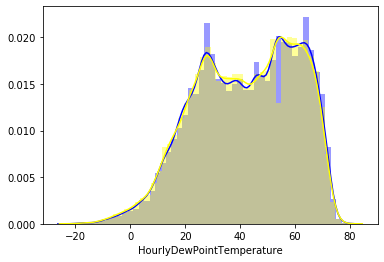

In [0]:
# Doing every single distplot was crashing the runtime so most are commented out
ax1 = sns.distplot(dist_weather['HourlyDewPointTemperature'],color='blue')
ax2 = sns.distplot(df_weather['HourlyDewPointTemperature'],color='yellow')
print(dist_weather['HourlyDewPointTemperature'].isnull().value_counts())
print(df_weather['HourlyDewPointTemperature'].isnull().value_counts())
ax1, ax2;

False    149438
True       4225
Name: HourlyDryBulbTemperature, dtype: int64
False    96327
True        58
Name: HourlyDryBulbTemperature, dtype: int64


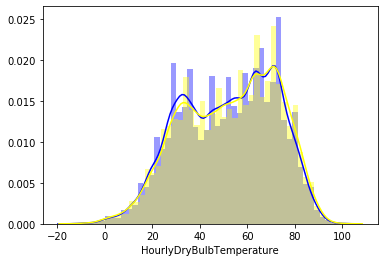

In [0]:
ax1 = sns.distplot(dist_weather['HourlyDryBulbTemperature'],color='blue')
ax2 = sns.distplot(df_weather['HourlyDryBulbTemperature'],color='yellow')
print(dist_weather['HourlyDryBulbTemperature'].isnull().value_counts())
print(df_weather['HourlyDryBulbTemperature'].isnull().value_counts())
ax1, ax2;

In [0]:
# ax1 = sns.distplot(dist_weather['HourlyPrecipitation'],color='blue')
# ax2 = sns.distplot(df_weather['HourlyPrecipitation'],color='yellow')
# print(dist_weather['HourlyPrecipitation'].isnull().value_counts())
# print(df_weather['HourlyPrecipitation'].isnull().value_counts())
# ax1, ax2;

In [0]:
# ax1 = sns.distplot(dist_weather['HourlyRelativeHumidity'],color='blue')
# ax2 = sns.distplot(df_weather['HourlyRelativeHumidity'],color='yellow')
# print(dist_weather['HourlyRelativeHumidity'].isnull().value_counts())
# print(df_weather['HourlyRelativeHumidity'].isnull().value_counts())
# ax1, ax2;

In [0]:
# ax1 = sns.distplot(dist_weather['HourlySeaLevelPressure'],color='blue')
# ax2 = sns.distplot(df_weather['HourlySeaLevelPressure'],color='yellow')
# print(dist_weather['HourlySeaLevelPressure'].isnull().value_counts())
# print(df_weather['HourlySeaLevelPressure'].isnull().value_counts())
# ax1, ax2;

In [0]:
# ax1 = sns.distplot(dist_weather['HourlyStationPressure'],color='blue')
# ax2 = sns.distplot(df_weather['HourlyStationPressure'],color='yellow')
# print(dist_weather['HourlyStationPressure'].isnull().value_counts())
# print(df_weather['HourlyStationPressure'].isnull().value_counts())
# ax1, ax2;

In [0]:
# ax1 = sns.distplot(dist_weather['HourlyVisibility'],color='blue')
# ax2 = sns.distplot(df_weather['HourlyVisibility'],color='yellow')
# print(dist_weather['HourlyVisibility'].isnull().value_counts())
# print(df_weather['HourlyVisibility'].isnull().value_counts())
# ax1, ax2;

In [0]:
# ax1 = sns.distplot(dist_weather['HourlyWindDirection'],color='blue')
# ax2 = sns.distplot(df_weather['HourlyWindDirection'],color='yellow')
# print(dist_weather['HourlyWindDirection'].isnull().value_counts())
# print(df_weather['HourlyWindDirection'].isnull().value_counts())
# ax1, ax2;

In [0]:
# ax1 = sns.distplot(dist_weather['HourlyWindSpeed'],color='blue')
# ax2 = sns.distplot(df_weather['HourlyWindSpeed'],color='yellow')
# print(dist_weather['HourlyWindSpeed'].isnull().value_counts())
# print(df_weather['HourlyWindSpeed'].isnull().value_counts())
# ax1, ax2;

In [0]:
# Are the distributions too different?

# Should I have resampled/interpolated in a different way?

# Could the differences be explained by the fact that there are now less 
# observations after resampling and I am only seeing a difference of 
# percentages rather than a difference in information?

## Create function to add year, month, day, and season variables

In [0]:
# Create year, month, day, and season variables
def add_time(df):
  df = df.copy()
  df['year'] = df.index.year
  df['month'] = df.index.month
  df['date'] = df.index.dayofyear
  df['hour'] = df.index.hour
  df['season'] = (df.index.month%12 + 3)//3
  df['season'] = df['season'].replace({1:'winter',
                                      2:'spring',
                                      3:'summer',
                                      4:'fall'})
  return df

In [0]:
df_weather = add_time(df_weather)

In [0]:
df_weather.shape
# The shape is wrong

(96385, 14)

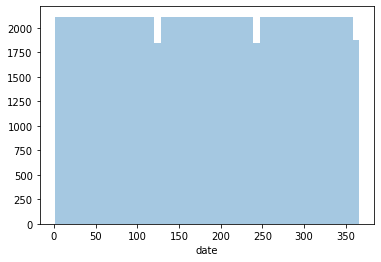

In [0]:
# Check out the distribution of the dates
sns.distplot(df_weather['date'],kde=False);
# Missing some...might be a problem when using lagged variables

# Import daily temperature data

In [0]:
df_daily_temp = pd.read_csv('https://github.com/cjakuc/DS-Unit1-Build-Week/raw/master/Weather%20Data/dayton_daily_temp.csv',
                             parse_dates=True,
                             index_col=0)
df_daily_temp = add_time(df_daily_temp).drop('hour',axis=1)
df_daily_temp.head()

,DailyAvgAirTemp,DailyCoolingDegreeDays,DailyHeatingDegreeDays,year,month,date,season
2005-01-01,48.0,0.0,17.0,2005,1,1,winter
2005-01-02,52.0,0.0,13.0,2005,1,2,winter
2005-01-03,50.0,0.0,15.0,2005,1,3,winter
2005-01-04,40.0,0.0,25.0,2005,1,4,winter
2005-01-05,36.0,0.0,29.0,2005,1,5,winter


# Energy data

In [0]:
# Import energy data
df_energy = pd.read_csv('https://github.com/cjakuc/DS-Unit1-Build-Week/blob/master/Energy%20Data/pjm_dayton_clean.csv?raw=true',
                        parse_dates=True,
                        index_col=0)
df_energy = add_time(df_energy).drop('timestamp',axis=1)
print(df_energy.shape, df_energy.head())
# The shape is wrong

(96341, 6)                          MW  year  month  date  season  hour
Datetime                                                    
2005-01-01 00:00:00  1560.0  2005      1     1  winter     0
2005-12-31 01:00:00  1706.0  2005     12   365  winter     1
2005-12-31 02:00:00  1630.0  2005     12   365  winter     2
2005-12-31 03:00:00  1586.0  2005     12   365  winter     3
2005-12-31 04:00:00  1569.0  2005     12   365  winter     4


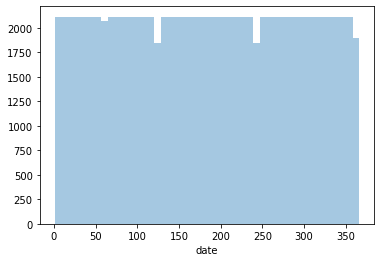

In [0]:
# Check out the distribution of the dates
sns.distplot(df_energy['date'],kde=False);
# Missing some...might be a problem when using lagged variables

# Combine all the datasets

In [0]:
df_full = pd.merge(df_weather,df_energy,
                   on=['year','month','date','hour','season'],
                   left_index=True,
                   right_index=True)
df_full.shape
# Less observations than both

(96318, 15)

In [0]:
df_full.head()

,HourlyDewPointTemperature,HourlyDryBulbTemperature,HourlyPrecipitation,HourlyRelativeHumidity,HourlySeaLevelPressure,HourlyStationPressure,HourlyVisibility,HourlyWindDirection,HourlyWindSpeed,year,month,date,hour,season,MW
2005-01-01 00:00:00,50.000000,50.000000,0.0,100.0,30.300,29.215000,1.500,225.000000,11.500000,2005,1,1,0,winter,1560.0
2005-01-01 01:00:00,50.833333,50.833333,0.0,100.0,30.305,29.223333,1.415,226.666667,8.666667,2005,1,1,1,winter,1490.0
2005-01-01 02:00:00,50.000000,50.000000,0.0,100.0,30.320,29.240000,0.250,200.000000,6.000000,2005,1,1,2,winter,1429.0
2005-01-01 03:00:00,50.000000,50.000000,0.0,100.0,30.340,29.250000,0.250,200.000000,3.000000,2005,1,1,3,winter,1367.0
2005-01-01 04:00:00,50.000000,50.000000,0.0,100.0,30.340,29.255000,0.250,100.000000,1.500000,2005,1,1,4,winter,1325.0


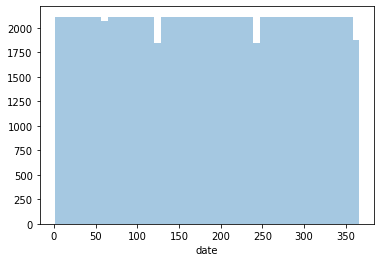

In [0]:
# Check out the distribution of the dates
sns.distplot(df_full['date'],kde=False);

In [0]:
# Merge in the daily temperature df
df_full = pd.merge(df_full,df_daily_temp,
                   on=['year','month','date','season'],
                   left_index=True,
                   how='left')
df_full.shape

(96318, 18)

In [0]:
display(df_full.head(),df_full.tail())
# Need to make it so the timestamp is still a part of the index?

,HourlyDewPointTemperature,HourlyDryBulbTemperature,HourlyPrecipitation,HourlyRelativeHumidity,HourlySeaLevelPressure,HourlyStationPressure,HourlyVisibility,HourlyWindDirection,HourlyWindSpeed,year,month,date,hour,season,MW,DailyAvgAirTemp,DailyCoolingDegreeDays,DailyHeatingDegreeDays
2005-01-01,50.000000,50.000000,0.0,100.0,30.300,29.215000,1.500,225.000000,11.500000,2005,1,1,0,winter,1560.0,48.0,0.0,17.0
2005-01-01,50.833333,50.833333,0.0,100.0,30.305,29.223333,1.415,226.666667,8.666667,2005,1,1,1,winter,1490.0,48.0,0.0,17.0
2005-01-01,50.000000,50.000000,0.0,100.0,30.320,29.240000,0.250,200.000000,6.000000,2005,1,1,2,winter,1429.0,48.0,0.0,17.0
2005-01-01,50.000000,50.000000,0.0,100.0,30.340,29.250000,0.250,200.000000,3.000000,2005,1,1,3,winter,1367.0,48.0,0.0,17.0
2005-01-01,50.000000,50.000000,0.0,100.0,30.340,29.255000,0.250,100.000000,1.500000,2005,1,1,4,winter,1325.0,48.0,0.0,17.0


,HourlyDewPointTemperature,HourlyDryBulbTemperature,HourlyPrecipitation,HourlyRelativeHumidity,HourlySeaLevelPressure,HourlyStationPressure,HourlyVisibility,HourlyWindDirection,HourlyWindSpeed,year,month,date,hour,season,MW,DailyAvgAirTemp,DailyCoolingDegreeDays,DailyHeatingDegreeDays
2015-12-30,30.0,35.0,0.0,82.0,30.25,29.140000,10.00,290.000000,9.0,2015,12,364,20,winter,2106.0,35.0,0.0,30.0
2015-12-30,29.0,33.0,0.0,85.0,30.24,29.140000,10.00,290.000000,11.0,2015,12,364,21,winter,2064.0,35.0,0.0,30.0
2015-12-30,29.0,33.0,0.0,85.0,30.24,29.136667,9.98,296.666667,8.0,2015,12,364,22,winter,1997.0,35.0,0.0,30.0
2015-12-30,29.0,32.0,0.0,88.0,30.24,29.130000,10.00,290.000000,9.0,2015,12,364,23,winter,1890.0,35.0,0.0,30.0
2015-12-31,29.0,32.0,0.0,88.0,30.24,29.130000,10.00,300.000000,6.0,2015,12,365,0,winter,1781.0,31.0,0.0,34.0


# Choose your target. Which column in your tabular dataset will you predict?

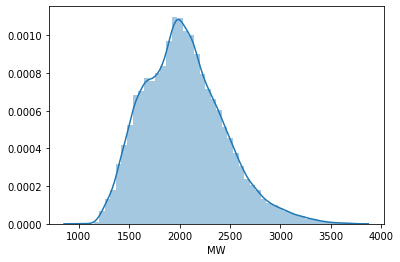

In [0]:
target = 'MW'
sns.distplot(df_full[target]);
# Slightly right skewed?

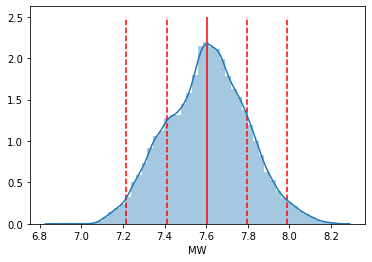

In [0]:
import matplotlib.pyplot as plt
sns.distplot(np.log(df_full[target]))
# Looks more normal after log transformation

# Line at the mean
plt.vlines(x=np.log(df_full[target]).mean(),
         ymin=0,
         ymax=2.5,
         color = 'red')
# Line 1 std dev above the mean
plt.vlines(x=np.log(df_full[target]).mean()+np.std(np.log(df_full[target])),
         ymin=0,
         ymax=2.5,
         color = 'red',
         linestyles='--')
# Line 1 std dev below the mean
plt.vlines(x=np.log(df_full[target]).mean()-np.std(np.log(df_full[target])),
         ymin=0,
         ymax=2.5,
         color = 'red',
         linestyles='--')
# Line 2 std dev above the mean
plt.vlines(x=np.log(df_full[target]).mean()+2*np.std(np.log(df_full[target])),
         ymin=0,
         ymax=2.5,
         color = 'red',
         linestyles='--')
# Line 2 std dev below the mean
plt.vlines(x=np.log(df_full[target]).mean()-2*np.std(np.log(df_full[target])),
         ymin=0,
         ymax=2.5,
         color = 'red',
         linestyles='--');

# Is your problem regression or classification?

Regression

# Choose your evaluation metric(s).
    - Regression: Will you use mean absolute error, root mean squared error, R^2, or other regression metrics?

MAE

# Choose which observations you will use to train, validate, and test your model.
    - Are some observations outliers? Will you exclude them?
    - Will you do a random split or a time-based split?

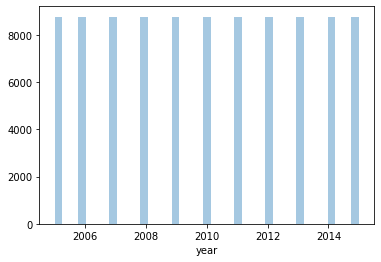

In [0]:
sns.distplot(df_full['year'],kde=False);
# Looks like all the years are distributed equally so I will choose
# based on year

In [0]:
df_full['year'].value_counts()

2014    8760
2013    8758
2012    8758
2011    8758
2009    8758
2008    8758
2007    8758
2006    8758
2005    8758
2010    8757
2015    8737
Name: year, dtype: int64

In [0]:
df_full['year'].sort_values(ascending=False)
# The last year is 2015
# 2015 will be the test
# 2014 will be the validation

2015-12-31    2015
2015-05-02    2015
2015-05-02    2015
2015-05-02    2015
2015-05-02    2015
              ... 
2005-09-01    2005
2005-09-01    2005
2005-09-01    2005
2005-09-01    2005
2005-01-01    2005
Name: year, Length: 96318, dtype: int64

In [0]:
# Create train, val, and test sets
train = df_full[df_full['year']<2014]
val = df_full[df_full['year']==2014]
test = df_full[df_full['year']==2015]

In [0]:
print(train.shape,val.shape,test.shape)
display(train.head(),val.head(),test.head())

(78821, 18) (8760, 18) (8737, 18)


,HourlyDewPointTemperature,HourlyDryBulbTemperature,HourlyPrecipitation,HourlyRelativeHumidity,HourlySeaLevelPressure,HourlyStationPressure,HourlyVisibility,HourlyWindDirection,HourlyWindSpeed,year,month,date,hour,season,MW,DailyAvgAirTemp,DailyCoolingDegreeDays,DailyHeatingDegreeDays
2005-01-01,50.000000,50.000000,0.0,100.0,30.300,29.215000,1.500,225.000000,11.500000,2005,1,1,0,winter,1560.0,48.0,0.0,17.0
2005-01-01,50.833333,50.833333,0.0,100.0,30.305,29.223333,1.415,226.666667,8.666667,2005,1,1,1,winter,1490.0,48.0,0.0,17.0
2005-01-01,50.000000,50.000000,0.0,100.0,30.320,29.240000,0.250,200.000000,6.000000,2005,1,1,2,winter,1429.0,48.0,0.0,17.0
2005-01-01,50.000000,50.000000,0.0,100.0,30.340,29.250000,0.250,200.000000,3.000000,2005,1,1,3,winter,1367.0,48.0,0.0,17.0
2005-01-01,50.000000,50.000000,0.0,100.0,30.340,29.255000,0.250,100.000000,1.500000,2005,1,1,4,winter,1325.0,48.0,0.0,17.0


,HourlyDewPointTemperature,HourlyDryBulbTemperature,HourlyPrecipitation,HourlyRelativeHumidity,HourlySeaLevelPressure,HourlyStationPressure,HourlyVisibility,HourlyWindDirection,HourlyWindSpeed,year,month,date,hour,season,MW,DailyAvgAirTemp,DailyCoolingDegreeDays,DailyHeatingDegreeDays
2014-01-01,19.0,24.0,0.0,81.0,30.30,29.190,10.00,0.0,0.0,2014,1,1,0,winter,1879.0,32.0,0.0,33.0
2014-01-01,19.0,24.0,0.0,81.0,30.30,29.185,9.97,30.0,1.5,2014,1,1,1,winter,1819.0,32.0,0.0,33.0
2014-01-01,19.0,24.0,0.0,81.0,30.30,29.180,10.00,0.0,0.0,2014,1,1,2,winter,1797.0,32.0,0.0,33.0
2014-01-01,18.0,23.0,0.0,81.0,30.29,29.170,10.00,110.0,5.0,2014,1,1,3,winter,1765.0,32.0,0.0,33.0
2014-01-01,18.5,23.5,0.0,81.0,30.28,29.160,9.97,115.0,5.0,2014,1,1,4,winter,1754.0,32.0,0.0,33.0


,HourlyDewPointTemperature,HourlyDryBulbTemperature,HourlyPrecipitation,HourlyRelativeHumidity,HourlySeaLevelPressure,HourlyStationPressure,HourlyVisibility,HourlyWindDirection,HourlyWindSpeed,year,month,date,hour,season,MW,DailyAvgAirTemp,DailyCoolingDegreeDays,DailyHeatingDegreeDays
2015-01-01,7.0,20.0,0.0,57.0,30.29,29.160,10.00,240.0,16.0,2015,1,1,0,winter,2001.0,28.0,0.0,37.0
2015-01-01,7.5,20.0,0.0,58.5,30.28,29.155,9.97,240.0,15.0,2015,1,1,1,winter,1950.0,28.0,0.0,37.0
2015-01-01,8.0,21.0,0.0,57.0,30.26,29.140,10.00,240.0,17.0,2015,1,1,2,winter,1912.0,28.0,0.0,37.0
2015-01-01,9.0,21.0,0.0,59.0,30.25,29.130,10.00,240.0,17.0,2015,1,1,3,winter,1866.0,28.0,0.0,37.0
2015-01-01,9.0,20.5,0.0,60.5,30.24,29.115,9.97,235.0,15.0,2015,1,1,4,winter,1859.0,28.0,0.0,37.0


In [0]:
df_full['date'].value_counts(ascending=True)[:20]

366     48
60     216
365    241
307    262
69     262
67     262
310    263
308    263
72     263
311    263
344    263
71     263
70     263
73     263
68     263
92     263
309    263
303    263
93     263
302    263
Name: date, dtype: int64

In [0]:
df_full.to_csv('BuildWeek2Clean1.csv')

In [0]:
import pandas_profiling
from pandas_profiling import ProfileReport
profile = ProfileReport(train, minimal=True).to_notebook_iframe()

profile